In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Questão 1 - Bolinhas

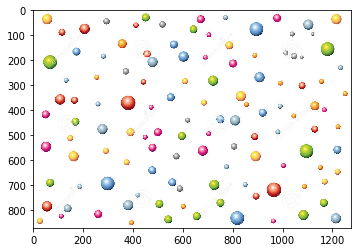

In [2]:
im_b = cv2.imread('imagens/texture-little-balls-10368211.jpg')
im_b = cv2.cvtColor(im_b, cv2.COLOR_BGR2RGB)
plt.imshow(im_b);

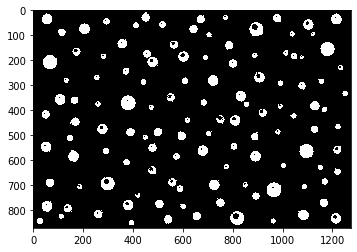

In [3]:
ret,im_thresh1 = cv2.threshold(im_b[:,:,2],230,255,cv2.THRESH_BINARY_INV)
plt.imshow(im_thresh1,'gray')


In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [5]:
img_erosion = cv2.dilate(im_thresh1,kernel,  iterations=7) 
img_erosion = cv2.erode(img_erosion,kernel,  iterations=2) 

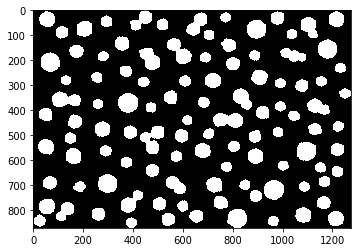

In [6]:
plt.imshow(img_erosion,'gray')

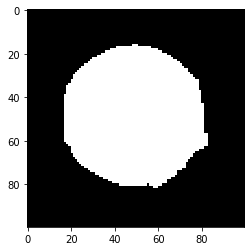

In [7]:
kernel_circle = img_erosion[160:260,20:120]
kernel_circle = cv2.dilate(kernel_circle,kernel,  iterations=4) 
kernel_circle = cv2.erode(kernel_circle,kernel,  iterations=7) 
plt.imshow(kernel_circle,'gray')

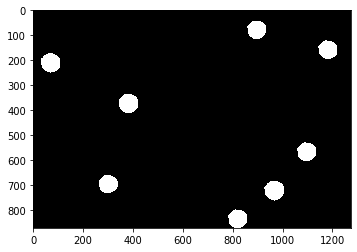

In [8]:
img_ = cv2.erode(img_erosion,kernel_circle,  iterations=1) 
img_ = cv2.dilate(img_,kernel_circle,  iterations=1) 

plt.imshow(img_,'gray')

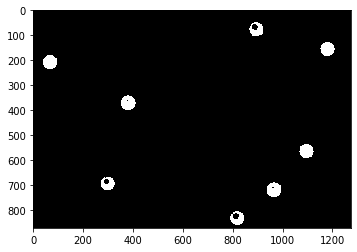

In [9]:
im_kernel = cv2.bitwise_and(im_thresh1,img_)


plt.imshow(im_kernel,'gray')

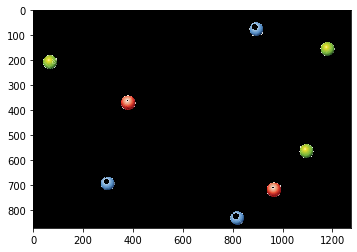

In [12]:
im_final = im_b.copy()

im_final[:,:,0] = cv2.bitwise_and(im_final[:,:,0],im_kernel)
im_final[:,:,1] = cv2.bitwise_and(im_final[:,:,1],im_kernel)

im_final[:,:,2] = cv2.bitwise_and(im_final[:,:,2],im_kernel)
plt.imshow(im_final);


## Questão 2

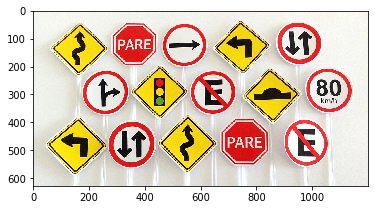

In [68]:
im_b = cv2.imread('imagens/placas-transito.jpg')
im_b = cv2.cvtColor(im_b, cv2.COLOR_BGR2RGB)
plt.imshow(im_b);

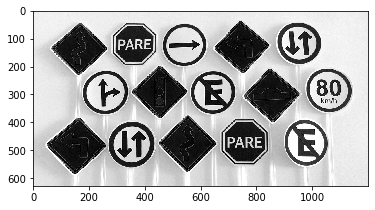

In [69]:
plt.imshow(im_b[:,:,2],'gray')

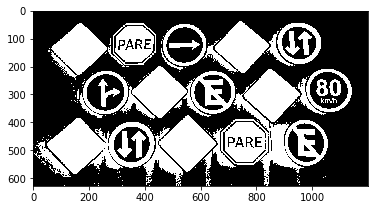

In [70]:
ret,im_thresh1 = cv2.threshold(im_b[:,:,2],200,250,cv2.THRESH_BINARY_INV)
plt.imshow(im_thresh1,'gray')

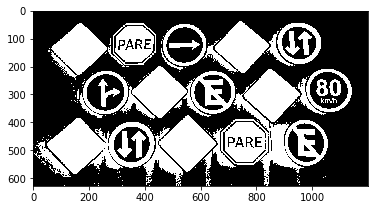

In [71]:
im1 = im_thresh1.copy()
#cv2.rectangle(im1, (250, 50), (300, 305),(0,0,255), -1)
plt.imshow(im1,'gray')

In [72]:
im1.shape

(628, 1200)

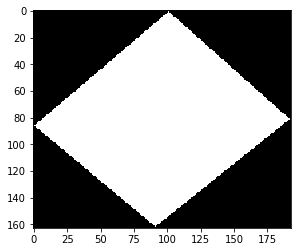

In [73]:
im1 = np.zeros(im_thresh1.shape)

pts = np.array([[70,135],[160,210],[260,130],[170,50]], np.int32)
pts = pts.reshape((-1,1,2))
#cv2.polylines(im1,[pts],True,(0,0,0),)
cv2.fillPoly(im1, pts =[pts], color=(255))

im1 = im1[49:212,69:262]

plt.imshow(im1,'gray')

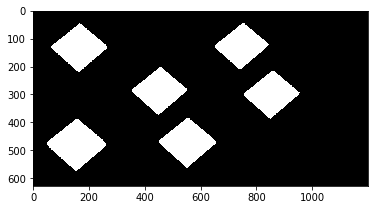

In [74]:
img_ = cv2.erode(im_thresh1,np.uint8(im1),  iterations=1) 
img_ = cv2.dilate(img_,np.uint8(im1),  iterations=1) 

plt.imshow(img_,'gray')

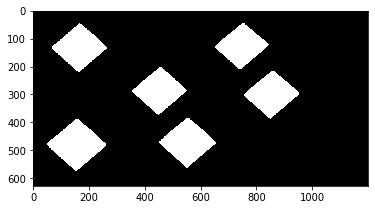

In [75]:
im_kernel = cv2.bitwise_and(im_thresh1,img_)
plt.imshow(im_kernel,'gray')

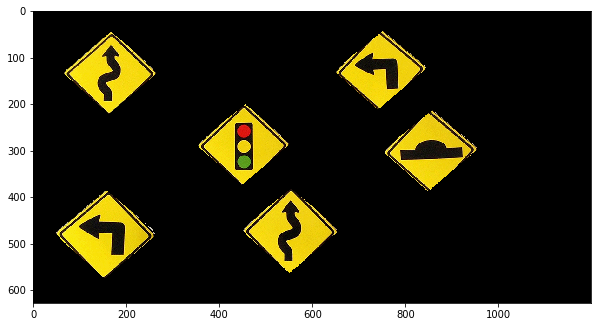

In [76]:
im_final = im_b.copy()

im_final[:,:,0] = cv2.bitwise_and(im_final[:,:,0],im_kernel)
im_final[:,:,1] = cv2.bitwise_and(im_final[:,:,1],im_kernel)

im_final[:,:,2] = cv2.bitwise_and(im_final[:,:,2],im_kernel)
plt.figure(figsize=(10,10))
plt.imshow(im_final);